## Data exploration and tidy data

### Objectives
* Tidy data, from theory to practice
* Explore raw data

### Notes
* Online course resource in R [link](https://rmagno.eu/tdvr.oct.22/). Some commands in R are shown as first line comment in the cells.



In [1]:
import os
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np

## 1. Raw data

In [2]:
from google.colab import drive
drive.mount('/content/drive')
gdrive_path = '/content/drive/MyDrive/Tidy_Python_2025/'
!mkdir -p $gdrive_path

%cd $gdrive_path

Mounted at /content/drive
/content/drive/MyDrive/Tidy_Python_2025


In [40]:
!rm -r 2025-tidy-python
!git clone https://github.com/Py-ualg/2025-tidy-python.git

rm: cannot remove '2025-tidy-python': No such file or directory
Cloning into '2025-tidy-python'...
remote: Enumerating objects: 923, done.
remote: Counting objects: 100% (923/923), done.
remote: Compressing objects: 100% (876/876), done.
remote: Total 923 (delta 130), reused 805 (delta 44), pack-reused 0 (from 0)
Receiving objects: 100% (923/923), 17.32 MiB | 10.77 MiB/s, done.
Resolving deltas: 100% (130/130), done.
Updating files: 100% (102/102), done.


In [ ]:
#@title Getting single file from the internet
# !wget https://github.com/Py-ualg/2025-tidy-python/blob/main/r2py/raw-data-python/2020-01-18_area1.csv

In [21]:
data_raw_path = gdrive_path+'2025-tidy-python/r2py/raw-data-python/'

In [22]:
!find . -name \*2020-0\*.csv |sort

./2025-tidy-python/r2py/raw-data-python/2020-01-05_ra.csv
./2025-tidy-python/r2py/raw-data-python/2020-01-05_rf.csv
./2025-tidy-python/r2py/raw-data-python/2020-02-23_ra.csv
./2025-tidy-python/r2py/raw-data-python/2020-02-23_rf.csv
./2025-tidy-python/r2py/raw-data-python/2020-03-08_ra.csv
./2025-tidy-python/r2py/raw-data-python/2020-03-08_rf.csv
./2025-tidy-python/r2py/raw-data-python/2020-04-21_ra.csv
./2025-tidy-python/r2py/raw-data-python/2020-04-21_rf.csv
./2025-tidy-python/r2py/raw-data-python/2020-05-31_ra.csv
./2025-tidy-python/r2py/raw-data-python/2020-05-31_rf.csv
./2025-tidy-python/r2py/raw-data-python/2020-06-26_ra.csv
./2025-tidy-python/r2py/raw-data-python/2020-06-26_rf.csv
./2025-tidy-python/r2py/raw-data-python/2020-07-08_ra.csv
./2025-tidy-python/r2py/raw-data-python/2020-07-08_rf.csv
./2025-tidy-python/r2py/raw-data-python/2020-08-11_ra.csv
./2025-tidy-python/r2py/raw-data-python/2020-08-11_rf.csv
./2025-tidy-python/r2py/raw-data-python/2020-09-10_ra.csv
./2025-tidy-py

In [23]:
# quadrats01 <- readxl::read_excel(file.path(data_raw_path, "quadrats.xlsx"))
quadrats01  = pd.read_excel(os.path.join(data_raw_path, 'quadrats.xlsx'))
quadrats01.head()

,Unnamed: 0,Ria Formosa-rf,Ria Alvor-ra
0,Area (m2),250,360


In [24]:
# df1_q1 <- readr::read_csv(file.path(data_raw_path, "2020-01-04_q1.csv"))
df1_ra = pd.read_csv(os.path.join(data_raw_path, '2020-01-05_ra.csv')).reset_index(drop=True)
# df1_rf <- readr::read_csv(file.path(data_raw_path, "2020-01-04_rf.csv"))
df1_rf = pd.read_csv(os.path.join(data_raw_path, '2020-01-05_rf.csv')).reset_index(drop=True)
df1_ra.shape, df1_rf.shape

((234, 17), (366, 17))

In [25]:
df1_ra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          234 non-null    int64  
 1   species_name        234 non-null    object 
 2   sex                 232 non-null    object 
 3   stage               234 non-null    object 
 4   is_gravid?          115 non-null    object 
 5   behavior            234 non-null    object 
 6   associated_species  234 non-null    object 
 7   depth [m]           234 non-null    float64
 8   cl [cm]             234 non-null    float64
 9   cw [cm]             234 non-null    float64
 10  lcl [cm]            234 non-null    float64
 11  rcl [cm]            234 non-null    float64
 12  fw [cm]             234 non-null    float64
 13  date                234 non-null    object 
 14  latitude            1 non-null      float64
 15  longitude           1 non-null      float64
 16  id      

In [26]:
df1_ra.describe()

,Unnamed: 0,depth [m],cl [cm],cw [cm],lcl [cm],rcl [cm],fw [cm],latitude,longitude,id
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,1.0,1.00,234.000000
mean,116.500000,6.316239,1.925288,1.910681,2.589032,2.015400,3.586247,37.1,-8.62,116.500000
std,67.694165,1.937431,1.284331,1.254561,1.730133,1.344362,0.092242,NaN,NaN,67.694165
min,0.000000,2.000000,0.188981,0.181662,0.223024,0.194278,3.363636,37.1,-8.62,0.000000
25%,58.250000,5.000000,0.922920,0.922645,1.287673,0.980441,3.545455,37.1,-8.62,58.250000
50%,116.500000,6.000000,1.661358,1.662197,2.167642,1.708044,3.545455,37.1,-8.62,116.500000
75%,174.750000,7.000000,2.590909,2.589295,3.480294,2.685821,3.636364,37.1,-8.62,174.750000
max,233.000000,13.000000,7.772727,7.377539,9.965221,7.889878,3.909091,37.1,-8.62,233.000000


In [27]:
# dplyr::glimpse(df1_ra)
df1_ra.T

,0,1,2,3,4,5,6,7,8,9,...,224,225,226,227,228,229,230,231,232,233
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,224,225,226,227,228,229,230,231,232,233
species_name,A. Farensis,A. Farensis,u. olhanen.,u. olhanen.,A farensis,A farensis,A. Farensis,A farensis,Ucides alvorensis,Ucides alvorensis,...,U. olhanensis,u. olhanen.,Ucides alvorensis,A farensis,Ucides alvorensis,u. olhanen.,u. olhanen.,U. olhanensis,A. Farensis,u. olhanen.
sex,male,female,female,female,female,female,male,female,NaN,male or female,...,female,female,male,female,male,male,male,male,female,female
stage,adult,adult,pre_puberty,pre_puberty,pre_puberty,sub_adult,adult,sub_adult,juvenile,pre_puberty,...,adult,adult,pre_puberty,adult,sub_adult,adult,pre_puberty,adult,adult,adult
is_gravid?,True,True,True,False,False,False,NaN,False,NaN,NaN,...,False,False,NaN,False,NaN,NaN,True,NaN,True,False
behavior,Interaction with hermit crabs.,Moving toward bait.,Hiding under seagrass blades.,Color changes during molting.,Inspecting discarded crab shell.,Pausing frequently during exploration.,Picking algae from rock surface.,Territorial display against intruder.,Hiding under floating debris.,Feeding on small mollusks.,...,Moving toward bait.,Sideways walking along bay edge.,Hiding beneath rocks.,Interaction with hermit crabs.,Climbing vertical rock face.,Climbing algae-covered rocks.,Using claws to dig into sediment.,Scavenging near tidal pools.,Picking algae from rock surface.,Territorial display against intruder.
associated_species,"['Sea Urchin', 'Algae']","['Sea Urchin', 'Hermit Crab', 'Shrimp', 'Crab ...","['Polychaete Worm', 'Sea Urchin']","['Coral Fragment', 'Jellyfish', 'Mussel', 'Sna...",['Jellyfish'],"['Jellyfish', 'Sea Anemone', 'Small Fish', 'Po...","['Jellyfish', 'Snail', 'Mussel', 'Crab (Other ...","['Sea Star', 'Sea Urchin', 'Snail', 'Sea Anemo...","['Snail', 'Coral Fragment', 'Sea Star']","['Sea Sponge', 'Sea Anemone', 'Sea Star', 'Cra...",...,"['Mussel', 'Sea Sponge', 'Small Fish']","['Small Fish', 'Polychaete Worm', 'Algae', 'Se...","['Mussel', 'Jellyfish', 'Sea Star', 'Barnacle']","['Snail', 'Jellyfish', 'Algae', 'Hermit Crab',...",['Polychaete Worm'],"['Shrimp', 'Jellyfish', 'Sea Star']","['Coral Fragment', 'Hermit Crab', 'Sea Sponge']","['Shrimp', 'Hermit Crab']","['Jellyfish', 'Crab (Other Species)', 'Polycha...","['Hermit Crab', 'Shrimp', 'Jellyfish']"
depth [m],5.0,6.0,9.0,3.0,7.0,5.0,8.0,9.0,9.0,9.0,...,4.0,4.0,9.0,6.0,8.0,7.0,6.0,7.0,6.0,8.0
cl [cm],0.681818,3.545931,0.39965,1.013242,0.971227,2.330431,2.863636,0.358741,0.5,1.022727,...,1.948773,1.870727,1.363636,1.329613,0.681818,3.0,0.75,7.363636,1.88225,1.847225
cw [cm],0.656055,3.771607,0.39081,0.951003,1.136769,2.793214,2.846627,0.384797,0.498107,1.030808,...,1.808791,1.765585,1.250887,1.317723,0.759739,3.258058,0.867626,6.641945,2.122407,1.93556


1. This is typically not what you do in `pandas`, we shouw it here, because of R counterpart of `dplyr::glimpse(df1_ra)`, in python you typically do `df1_ra.head()`, however for wider tables, transposition is not a stupid idea.
2. We probably do not need the `Unnamed: 0` and `id` columns

In [28]:
# colnames(df1_ra)
df1_ra.columns  # index might be difficult to work with, get list by simply: list(df1_ra.columns)

Index(['Unnamed: 0', 'species_name', 'sex', 'stage', 'is_gravid?', 'behavior',
       'associated_species', 'depth [m]', 'cl [cm]', 'cw [cm]', 'lcl [cm]',
       'rcl [cm]', 'fw [cm]', 'date', 'latitude', 'longitude', 'id'],
      dtype='object')

In [29]:
 # in R: (nrow() and ncol())
f"Table with {df1_ra.shape[0]} rows and {df1_ra.shape[1]} columns."

'Table with 234 rows and 17 columns.'

In [30]:
#@title Value counts in column
# table(df1_ra$stage)
df1_ra['stage'].value_counts()

,count
stage,
adult,83
sub_adult,73
pre_puberty,45
juvenile,33


In [31]:
df1_rf['stage'].value_counts()

,count
stage,
adult,130
sub_adult,109
pre_puberty,74
juvenile,53


The "stage" column in has different labes for categories in the two data_frams. They will have to be standardized.

In [32]:
# Unique values in column
# unique(df1_ra$sex)
df1_ra['sex'].unique()

array(['male', 'female', nan, 'male or female', ' ', 'N/R', '-'],
      dtype=object)

The "sex" categories will have to be cleaned.

In [33]:
df1_ra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          234 non-null    int64  
 1   species_name        234 non-null    object 
 2   sex                 232 non-null    object 
 3   stage               234 non-null    object 
 4   is_gravid?          115 non-null    object 
 5   behavior            234 non-null    object 
 6   associated_species  234 non-null    object 
 7   depth [m]           234 non-null    float64
 8   cl [cm]             234 non-null    float64
 9   cw [cm]             234 non-null    float64
 10  lcl [cm]            234 non-null    float64
 11  rcl [cm]            234 non-null    float64
 12  fw [cm]             234 non-null    float64
 13  date                234 non-null    object 
 14  latitude            1 non-null      float64
 15  longitude           1 non-null      float64
 16  id      

In [34]:
df1_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          366 non-null    int64  
 1   species             366 non-null    object 
 2   sex                 361 non-null    object 
 3   stage               366 non-null    object 
 4   is_gravid           195 non-null    object 
 5   behaviour           366 non-null    object 
 6   associated_species  366 non-null    object 
 7   depth [m]           366 non-null    float64
 8   cl [mm]             366 non-null    float64
 9   cw [mm]             366 non-null    float64
 10  lcl [mm]            366 non-null    float64
 11  rcl [mm]            366 non-null    float64
 12  fw [mm]             366 non-null    float64
 13  date                366 non-null    object 
 14  latitude            1 non-null      float64
 15  longitude           1 non-null      float64
 16  id      

### Comparing the species distribution of the two places

In [35]:
df1_ra['species_name'].value_counts()

,count
species_name,
A farensis,62
u. olhanen.,59
U. olhanensis,48
A. Farensis,40
Ucides alvorensis,25


In [36]:
df1_rf['species'].value_counts()

,count
species,
u. olhanen.,113
U. olhanensis,87
A farensis,76
A. Farensis,57
Ucides alvorensis,33


In [37]:
s1 = df1_ra['species_name'].value_counts().rename('Ria do Alvor')
s2 = df1_rf['species'].value_counts().rename('Ria Formosa')
df = pd.concat([s1,s2],axis=1)
#df.columns = ['Ria do Alvor', 'Ria Formosa']
df

,Ria do Alvor,Ria Formosa
A farensis,62,76
u. olhanen.,59,113
U. olhanensis,48,87
A. Farensis,40,57
Ucides alvorensis,25,33


<Axes: >

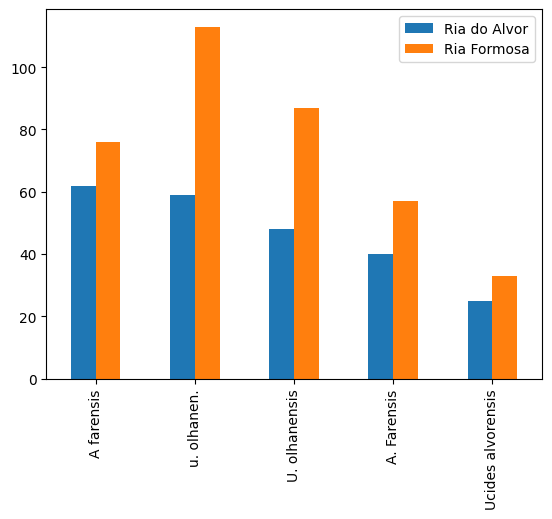

In [38]:
df.plot(kind='bar')

1. Another problem, we have inconsistent species names.
2. Since the the total counts are different, we need to normalize the data (conert to relative percentages) before comparing: